In [48]:
import spacy
!spacy download it_core_news_sm

[+] Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')


In [49]:
!spacy download it

  Using cached https://github.com/explosion/spacy-models/releases/download/it_core_news_sm-3.0.0/it_core_news_sm-3.0.0-py3-none-any.whl (17.1 MB)
[!] As of spaCy v3.0, shortcuts like 'it' are deprecated. Please use the full
pipeline package name 'it_core_news_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')


In [1]:
!pip install feel-it
!pip install Counter
!pip install transformers

In [2]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import gensim
#import Cnter
import torch
from collections import Counter
from wordcloud import WordCloud

from feel_it import EmotionClassifier, SentimentClassifier


In [25]:
from wordcloud import WordCloud, ImageColorGenerator
import wordninja
from spellchecker import SpellChecker
from collections import Counter
import seaborn as sns
import nltk
import math
import random
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('italian'))  
stop_words.add("amp")
plt.rcParams['figure.figsize'] = [10, 8]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aliis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aliis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#tweet_agosto = pd.read_csv("/content/drive/MyDrive/Progetto seminario/tweet_agosto.csv")

tweetTOT = pd.read_csv("dati/df_finale_2020_2021_nltk_analysis.csv")

In [5]:
tweetTOT

,Unnamed: 0,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,...,ment_count,token,n_tok,token_lunghezza_media,tweet_POS,POS_count,POS_lunghezza_media,hash_unique_count,hash_lunghezza_media,word_f
0,0,2020-06-04,266910319,appleforyou83,Theappleforyou,immuni app contenere contagi covid fase vers,[],0,0,0,...,0,"['immuni', 'app', 'contenere', 'contagi', 'cov...",7,8.571429,"[('immuni', 'JJ'), ('app', 'NN'), ('contenere'...",12,7.928571,0,NaN,immuni
1,1,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,valà piergianfranco lotta privacy chissà azion...,[],1,0,0,...,0,"['valà', 'piergianfranco', 'lotta', 'privacy',...",14,10.714286,"[('valà', 'NN'), ('piergianfranco', 'NN'), ('l...",18,8.857143,0,NaN,privacy
2,2,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,scaricate app immuni serve governo tracciarci ...,[],1,0,4,...,0,"['scaricate', 'app', 'immuni', 'serve', 'gover...",11,10.363636,"[('scaricate', 'NN'), ('app', 'NN'), ('immuni'...",14,8.681818,0,NaN,immuni
3,3,2020-06-04,1267957495324172288,aleessi4m,alessia ✨,diegofusaro scusa attimo tieni così tanto priv...,[],0,0,1,...,1,"['diegofusaro', 'scusa', 'attimo', 'tieni', 'c...",19,8.789474,"[('diegofusaro', 'NN'), ('scusa', 'NN'), ('att...",23,7.894737,0,NaN,privacy
4,4,2020-06-04,1337280565,garboek,GabryKeegan,qualcuno adotti bambino appimmu,[],0,0,2,...,0,"['qualcuno', 'adotti', 'bambino', 'appimmu']",4,10.250000,"[('qualcuno', 'NN'), ('adotti', 'NNS'), ('bamb...",7,8.750000,1,9.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9779,9779,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,giorgiameloni belpietrotweet giusto rendiamo o...,"[{'screen_name': 'immuni_app', 'name': 'immuni...",0,0,0,...,3,"['giorgiameloni', 'belpietrotweet', 'giusto', ...",22,10.590909,"[('giorgiameloni', 'JJ'), ('belpietrotweet', '...",27,8.818182,3,10.666667,immuniapp
9780,9780,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,update greenpass zoneacolori restrizioni lockd...,[],0,0,0,...,0,"['update', 'greenpass', 'zoneacolori', 'restri...",25,10.680000,"[('update', 'JJ'), ('greenpass', 'NN'), ('zone...",34,8.900000,15,9.133333,greenpass
9781,9781,2021-08-08,1006624848272154624,grossofanken,grossofanken,bel cashback ogni esibizione scaricato esclusi...,[],1,0,0,...,0,"['bel', 'cashback', 'ogni', 'esibizione', 'sca...",9,11.111111,"[('bel', 'NN'), ('cashback', 'NN'), ('ogni', '...",12,9.055556,3,12.666667,immuniapp
9782,9782,2021-08-29,1260497008986652678,lorech__,Lore,dino sbonaccini vede differenza problema grave...,[],3,0,3,...,2,"['dino', 'sbonaccini', 'vede', 'differenza', '...",16,9.375000,"[('dino', 'NN'), ('sbonaccini', 'NN'), ('vede'...",19,8.250000,0,NaN,immuniapp


In [6]:
tweetTOT.tail(5)

,Unnamed: 0,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,...,ment_count,token,n_tok,token_lunghezza_media,tweet_POS,POS_count,POS_lunghezza_media,hash_unique_count,hash_lunghezza_media,word_f
9779,9779,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,giorgiameloni belpietrotweet giusto rendiamo o...,"[{'screen_name': 'immuni_app', 'name': 'immuni...",0,0,0,...,3,"['giorgiameloni', 'belpietrotweet', 'giusto', ...",22,10.590909,"[('giorgiameloni', 'JJ'), ('belpietrotweet', '...",27,8.818182,3,10.666667,immuniapp
9780,9780,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,update greenpass zoneacolori restrizioni lockd...,[],0,0,0,...,0,"['update', 'greenpass', 'zoneacolori', 'restri...",25,10.680000,"[('update', 'JJ'), ('greenpass', 'NN'), ('zone...",34,8.900000,15,9.133333,greenpass
9781,9781,2021-08-08,1006624848272154624,grossofanken,grossofanken,bel cashback ogni esibizione scaricato esclusi...,[],1,0,0,...,0,"['bel', 'cashback', 'ogni', 'esibizione', 'sca...",9,11.111111,"[('bel', 'NN'), ('cashback', 'NN'), ('ogni', '...",12,9.055556,3,12.666667,immuniapp
9782,9782,2021-08-29,1260497008986652678,lorech__,Lore,dino sbonaccini vede differenza problema grave...,[],3,0,3,...,2,"['dino', 'sbonaccini', 'vede', 'differenza', '...",16,9.375000,"[('dino', 'NN'), ('sbonaccini', 'NN'), ('vede'...",19,8.250000,0,NaN,immuniapp
9783,9783,2021-12-31,866679978,fede2_4,Shadow,enricoletta cappellini serviva lockdownsubito ...,[],1,0,0,...,2,"['enricoletta', 'cappellini', 'serviva', 'lock...",21,9.571429,"[('enricoletta', 'NN'), ('cappellini', 'NN'), ...",25,8.285714,5,13.400000,immuniapp


In [7]:
tweet2020_= tweetTOT[tweetTOT["date"] <= "2020-12-31"]
tweet2020_.shape

(6397, 23)

In [8]:
tweet2021_= tweetTOT[tweetTOT["date"] >= "2021-01-01"]
tweet2021_.shape

(3387, 23)

In [9]:
emotion_classifier = EmotionClassifier()

In [10]:
sentiment_classifier = SentimentClassifier()

In [11]:
def emotion_class(tweet):
    return emotion_classifier.predict(tweet)

In [12]:
def sentiment_class(tweet):
    return sentiment_classifier.predict(tweet)

In [13]:
import torch
import numpy as np 
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("MilaNLProc/feel-it-italian-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("MilaNLProc/feel-it-italian-sentiment")

def sentiment_class(tweet):
    sentence = tweet
    inputs = tokenizer(sentence, return_tensors="pt")
    # Call the model and get the logits
    labels = torch.tensor([1]).unsqueeze(0)  # Batch size 1
    outputs = model(**inputs, labels=labels)
    loss, logits = outputs[:2]
    logits = logits.squeeze(0)
    
    # Extract probabilities
    proba = torch.nn.functional.softmax(logits, dim=0)
    # Unpack the tensor to obtain negative and positive probabilities
    negative, positive = proba
    negativeP = np.round(negative.item(), 4)
    positiveP = np.round(positive.item(), 4)
    print(f"Probabilities: Negative {np.round(negative.item(),4)} - Positive {np.round(positive.item(),4)}")
    
    return [negativeP, positiveP]

In [14]:
tweetTOT['neg'], tweetTOT['pos'] = zip(*tweetTOT['tweet'].apply(lambda x: sentiment_class(x)))


Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9991 - Positive 0.0009
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9992 - Positive 0.0008
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.789 - Positive 0.211
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9975 - Positive 0.0025
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negativ

Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0002 - Positive 0.9998
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9988 - Positive 0.0012
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negat

Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9993 - Positive 0.0007
Probabilities: Negative 0.0004 - Positive 0.9996
Probabilities: Negative 0.9965 - Positive 0.0035
Probabilities: Negative 0.0011 - Positive 0.9989
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9934 - Positive 0.0066
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9984 - Positive 0.0016
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9991 - Positive 0.0009
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.0019 - Positive 0.9981
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9989 - Positive 0.0011
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.001 - Positive 0.999
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9984 - Positive 0.0016
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9934 - Positive 0.0066
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0002 - Positive 0.9998
Probabilities: Negativ

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0039 - Positive 0.9961
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0004 - Positive 0.9996
Probabilities: Negative 0.0004 - Positive 0.9996
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9995 - Positive 0.0005
Probabilities: Negative 0.9934 - Positive 0.0066
Probabilities: Negative 0.9981 - Positive 0.0019
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0002 - Positive 0.9998
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.0015 - Positive 0.9985
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9981 - Positive 0.0019
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9532 - Positive 0.0468
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.001 - Positive 0.999
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.7652 - Positive 0.2348
Probabilities: Negativ

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9974 - Positive 0.0026
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9992 - Positive 0.0008
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9972 - Positive 0.0028
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9983 - Positive 0.0017
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.997 - Positive 0.003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negativ

Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9994 - Positive 0.0006
Probabilities: Negative 0.9987 - Positive 0.0013
Probabilities: Negative 0.9995 - Positive 0.0005
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9995 - Positive 0.0005
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0002 - Positive 0.9998
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9962 - Positive 0.0038
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9995 - Positive 0.0005
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.4159 - Positive 0.5841
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.033 - Positive 0.967
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0996 - Positive 0.9004
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9993 - Positive 0.0007
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negativ

Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9995 - Positive 0.0005
Probabilities: Negative 0.9987 - Positive 0.0013
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0803 - Positive 0.9197
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0581 - Positive 0.9419
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9945 - Positive 0.0055
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9926 - Positive 0.0074
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0008 - Positive 0.9992
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9995 - Positive 0.0005
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.002 - Positive 0.998
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negativ

Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0002 - Positive 0.9998
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.5582 - Positive 0.4418
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9849 - Positive 0.0151
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9994 - Positive 0.0006
Probabilities: Negative 0.0007 - Positive 0.9993
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9992 - Positive 0.0008
Probabilities: Negative 0.0008 - Positive 0.9992
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.3444 - Positive 0.6556
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9992 - Positive 0.0008
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9989 - Positive 0.0011
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9982 - Positive 0.0018
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0086 - Positive 0.9914
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0007 - Positive 0.9993
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.2053 - Positive 0.7947
Probabilities: Negative 0.981 - Positive 0.019
Probabilities: Negative 0.9968 - Positive 0.0032
Probabilities: Negativ

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0004 - Positive 0.9996
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9995 - Positive 0.0005
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.997 - Positive 0.003
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.0005 - Positive 0.9995
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.8132 - Positive 0.1868
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negativ

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0021 - Positive 0.9979
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.001 - Positive 0.999
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9992 - Positive 0.0008
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9994 - Positive 0.0006
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0002 - Positive 0.9998
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negativ

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0005 - Positive 0.9995
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.2853 - Positive 0.7147
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9957 - Positive 0.0043
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0004 - Positive 0.9996
Probabilities: Negative 0.0013 - Positive 0.9987
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.8543 - Positive 0.1457
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.1573 - Positive 0.8427
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.0005 - Positive 0.9995
Probabilities: Negative 0.9995 - Positive 0.0005
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9994 - Positive 0.0006
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9978 - Positive 0.0022
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9993 - Positive 0.0007
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.0004 - Positive 0.9996
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.4474 - Positive 0.5526
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9995 - Positive 0.0005
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.0007 - Positive 0.9993
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.1349 - Positive 0.8651
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.9995 - Positive 0.0005
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9994 - Positive 0.0006
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9994 - Positive 0.0006
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9994 - Positive 0.0006
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0092 - Positive 0.9908
Probabilities: Negative 0.9902 - Positive 0.0098
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.999 - Positive 0.001
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0193 - Positive 0.9807
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negativ

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9973 - Positive 0.0027
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9995 - Positive 0.0005
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0827 - Positive 0.9173
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9995 - Positive 0.0005
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9993 - Positive 0.0007
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9992 - Positive 0.0008
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9961 - Positive 0.0039
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9994 - Positive 0.0006
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0002 - Positive 0.9998
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0002 - Positive 0.9998
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9995 - Positive 0.0005
Probabilities: Negative 0.9992 - Positive 0.0008
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.001 - Positive 0.999
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.301 - Positive 0.699
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.0335 - Positive 0.9665
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0043 - Positive 0.9957
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.8715 - Positive 0.1285
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.999 - Positive 0.001
Probabilities: Negative 0.2481 - Positive 0.7519
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negativ

Probabilities: Negative 0.9789 - Positive 0.0211
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0002 - Positive 0.9998
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9977 - Positive 0.0023
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9994 - Positive 0.0006
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.9905 - Positive 0.0095
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0093 - Positive 0.9907
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0004 - Positive 0.9996
Probabilities: Negative 0.9981 - Positive 0.0019
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.959 - Positive 0.041
Probabilities: Negative 0.9971 - Positive 0.0029
Probabilities: Negative 0.0005 - Positive 0.9995
Probabilities: Negative 0.3452 - Positive 0.6548
Probabilities: Negative 0.0008 - Positive 0.9992
Probabilities: Negative 0.0013 - Positive 0.9987
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9994 - Positive 0.0006
Probabilities: Negativ

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0023 - Positive 0.9977
Probabilities: Negative 0.0579 - Positive 0.9421
Probabilities: Negative 0.0004 - Positive 0.9996
Probabilities: Negative 0.9805 - Positive 0.0195
Probabilities: Negative 0.7567 - Positive 0.2433
Probabilities: Negative 0.645 - Positive 0.355
Probabilities: Negative 0.0008 - Positive 0.9992
Probabilities: Negative 0.4282 - Positive 0.5718
Probabilities: Negative 0.645 - Positive 0.355
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0106 - Positive 0.9894
Probabilities: Negative 0.0006 - Positive 0.9994
Probabilities: Negative 0.9972 - Positive 0.0028
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.1416 - Positive 0.8584
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 

Probabilities: Negative 0.9396 - Positive 0.0604
Probabilities: Negative 0.0002 - Positive 0.9998
Probabilities: Negative 0.9752 - Positive 0.0248
Probabilities: Negative 0.9991 - Positive 0.0009
Probabilities: Negative 0.0109 - Positive 0.9891
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.8286 - Positive 0.1714
Probabilities: Negative 0.9992 - Positive 0.0008
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9994 - Positive 0.0006
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0268 - Positive 0.9732
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0002 - Positive 0.9998
Probabilities: Negative 0.9995 - Positive 0.0005
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0025 - Positive 0.9975
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9828 - Positive 0.0172
Probabilities: Negative 0.9992 - Positive 0.0008
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0012 - Positive 0.9988
Probabilities: Negative 0.9995 - Positive 0.0005
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.0094 - Positive 0.9906
Probabilities: Negative 0.9994 - Positive 0.0006
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9992 - Positive 0.0008
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negat

Probabilities: Negative 0.9994 - Positive 0.0006
Probabilities: Negative 0.1517 - Positive 0.8483
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9995 - Positive 0.0005
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.1865 - Positive 0.8135
Probabilities: Negative 0.0017 - Positive 0.9983
Probabilities: Negative 0.024 - Positive 0.976
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.012 - Positive 0.988
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 

Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.0004 - Positive 0.9996
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.8741 - Positive 0.1259
Probabilities: Negative 0.0176 - Positive 0.9824
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0004 - Positive 0.9996
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.0018 - Positive 0.9982
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.9991 - Positive 0.0009
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9988 - Positive 0.0012
Probabilities: Negat

Probabilities: Negative 0.9961 - Positive 0.0039
Probabilities: Negative 0.0002 - Positive 0.9998
Probabilities: Negative 0.0643 - Positive 0.9357
Probabilities: Negative 0.003 - Positive 0.997
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0006 - Positive 0.9994
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.0008 - Positive 0.9992
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negativ

Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.5886 - Positive 0.4114
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.0006 - Positive 0.9994
Probabilities: Negative 0.0173 - Positive 0.9827
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.0024 - Positive 0.9976
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negat

Probabilities: Negative 0.9726 - Positive 0.0274
Probabilities: Negative 0.4982 - Positive 0.5018
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.013 - Positive 0.987
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negativ

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.4598 - Positive 0.5402
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9992 - Positive 0.0008
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0005 - Positive 0.9995
Probabilities: Negat

Probabilities: Negative 0.9992 - Positive 0.0008
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9994 - Positive 0.0006
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9994 - Positive 0.0006
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9991 - Positive 0.0009
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9979 - Positive 0.0021
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9947 - Positive 0.0053
Probabilities: Negative 0.1206 - Positive 0.8794
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9995 - Positive 0.0005
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0074 - Positive 0.9926
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0053 - Positive 0.9947
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.9976 - Positive 0.0024
Probabilities: Negative 0.9994 - Positive 0.0006
Probabilities: Negative 0.9096 - Positive 0.0904
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0012 - Positive 0.9988
Probabilities: Negative 0.9865 - Positive 0.0135
Probabilities: Negat

Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9942 - Positive 0.0058
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9345 - Positive 0.0655
Probabilities: Negative 0.9981 - Positive 0.0019
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9995 - Positive 0.0005
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9995 - Positive 0.0005
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0037 - Positive 0.9963
Probabilities: Negat

Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.9379 - Positive 0.0621
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0017 - Positive 0.9983
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0007 - Positive 0.9993
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9947 - Positive 0.0053
Probabilities: Negative 0.0462 - Positive 0.9538
Probabilities: Negative 0.9952 - Positive 0.0048
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.147 - Positive 0.853
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.0007 - Positive 0.9993
Probabilities: Negativ

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.0011 - Positive 0.9989
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0248 - Positive 0.9752
Probabilities: Negative 0.0006 - Positive 0.9994
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9965 - Positive 0.0035
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0456 - Positive 0.9544
Probabilities: Negative 0.0004 - Positive 0.9996
Probabilities: Negative 0.0022 - Positive 0.9978
Probabilities: Negative 0.0014 - Positive 0.9986
Probabilities: Negative 0.0129 - Positive 0.9871
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0014 - Positive 0.9986
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9939 - Positive 0.0061
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9984 - Positive 0.0016
Probabilities: Negative 0.9995 - Positive 0.0005
Probabilities: Negative 0.8975 - Positive 0.1025
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.0004 - Positive 0.9996
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.0716 - Positive 0.9284
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.0005 - Positive 0.9995
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9994 - Positive 0.0006
Probabilities: Negative 0.999 - Positive 0.001
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9984 - Positive 0.0016
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.999 - Positive 0.001
Probabilities: Negative 

Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9986 - Positive 0.0014
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0007 - Positive 0.9993
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.9996 - Positive 0.0004
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0003 - Positive 0.9997
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9992 - Positive 0.0008
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0014 - Positive 0.9986
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9858 - Positive 0.0142
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0028 - Positive 0.9972
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0002 - Positive 0.9998
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.0015 - Positive 0.9985
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9997 - Positive 0.0003
Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negat

Probabilities: Negative 0.9998 - Positive 0.0002
Probabilities: Negative 0.9998 - Positive 0.0002


In [15]:
tweetTOT

,Unnamed: 0,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,...,n_tok,token_lunghezza_media,tweet_POS,POS_count,POS_lunghezza_media,hash_unique_count,hash_lunghezza_media,word_f,neg,pos
0,0,2020-06-04,266910319,appleforyou83,Theappleforyou,immuni app contenere contagi covid fase vers,[],0,0,0,...,7,8.571429,"[('immuni', 'JJ'), ('app', 'NN'), ('contenere'...",12,7.928571,0,NaN,immuni,0.9998,0.0002
1,1,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,valà piergianfranco lotta privacy chissà azion...,[],1,0,0,...,14,10.714286,"[('valà', 'NN'), ('piergianfranco', 'NN'), ('l...",18,8.857143,0,NaN,privacy,0.9998,0.0002
2,2,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,scaricate app immuni serve governo tracciarci ...,[],1,0,4,...,11,10.363636,"[('scaricate', 'NN'), ('app', 'NN'), ('immuni'...",14,8.681818,0,NaN,immuni,0.9998,0.0002
3,3,2020-06-04,1267957495324172288,aleessi4m,alessia ✨,diegofusaro scusa attimo tieni così tanto priv...,[],0,0,1,...,19,8.789474,"[('diegofusaro', 'NN'), ('scusa', 'NN'), ('att...",23,7.894737,0,NaN,privacy,0.9998,0.0002
4,4,2020-06-04,1337280565,garboek,GabryKeegan,qualcuno adotti bambino appimmu,[],0,0,2,...,4,10.250000,"[('qualcuno', 'NN'), ('adotti', 'NNS'), ('bamb...",7,8.750000,1,9.000000,NaN,0.9991,0.0009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9779,9779,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,giorgiameloni belpietrotweet giusto rendiamo o...,"[{'screen_name': 'immuni_app', 'name': 'immuni...",0,0,0,...,22,10.590909,"[('giorgiameloni', 'JJ'), ('belpietrotweet', '...",27,8.818182,3,10.666667,immuniapp,0.9997,0.0003
9780,9780,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,update greenpass zoneacolori restrizioni lockd...,[],0,0,0,...,25,10.680000,"[('update', 'JJ'), ('greenpass', 'NN'), ('zone...",34,8.900000,15,9.133333,greenpass,0.9998,0.0002
9781,9781,2021-08-08,1006624848272154624,grossofanken,grossofanken,bel cashback ogni esibizione scaricato esclusi...,[],1,0,0,...,9,11.111111,"[('bel', 'NN'), ('cashback', 'NN'), ('ogni', '...",12,9.055556,3,12.666667,immuniapp,0.0004,0.9996
9782,9782,2021-08-29,1260497008986652678,lorech__,Lore,dino sbonaccini vede differenza problema grave...,[],3,0,3,...,16,9.375000,"[('dino', 'NN'), ('sbonaccini', 'NN'), ('vede'...",19,8.250000,0,NaN,immuniapp,0.9998,0.0002


In [16]:
import torch
import numpy as np 
from transformers import AutoTokenizer, AutoModelForSequenceClassification
  
tokenizer = AutoTokenizer.from_pretrained("MilaNLProc/feel-it-italian-emotion")

model = AutoModelForSequenceClassification.from_pretrained("MilaNLProc/feel-it-italian-emotion")

def emotion_class(tweet):
    sentence = tweet
    inputs = tokenizer(sentence, return_tensors="pt")
    # Call the model and get the logits
    labels = torch.tensor([1]).unsqueeze(0)  # Batch size 1
    outputs = model(**inputs, labels=labels)
    loss, logits = outputs[:2]
    logits = logits.squeeze(0)
    # Extract probabilities
    proba = torch.nn.functional.softmax(logits, dim=0)
    proba = np.array(proba.detach().numpy())
    
    # Obtain emotion probabilities (sorted)
    label_names = ['anger', 'fear', 'joy', 'sadness']
    ranking = np.argsort(proba)
    ranking = ranking[::-1]
    for i in range(proba.shape[0]):
        l = label_names[ranking[i]]
        s = proba[ranking[i]]
    print(f"{l} {np.round(float(s), 4)}")
    return label_names[ranking[0]]

In [17]:
tweetTOT["sentiment"] = tweetTOT['tweet'].apply(lambda x: emotion_class(x))

joy 0.0005
joy 0.0001
joy 0.0001
joy 0.0001
sadness 0.0307
joy 0.0001
fear 0.0277
joy 0.0001
joy 0.0001
joy 0.0004
joy 0.001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0005
joy 0.0001
joy 0.0004
sadness 0.0051
joy 0.0005
joy 0.0001
joy 0.0001
sadness 0.0009
joy 0.0001
joy 0.0002
sadness 0.0011
joy 0.0002
sadness 0.0009
sadness 0.0009
sadness 0.0007
joy 0.0002
joy 0.0007
joy 0.0007
joy 0.0001
joy 0.0007
joy 0.0007
joy 0.0007
joy 0.0001
joy 0.0002
joy 0.0007
sadness 0.0009
anger 0.0012
sadness 0.0015
joy 0.0001
sadness 0.0007
sadness 0.0002
joy 0.0001
joy 0.0001
joy 0.0007
joy 0.0001
joy 0.0007
sadness 0.0028
anger 0.0002
anger 0.0007
joy 0.0007
joy 0.0001
joy 0.0006
joy 0.0007
joy 0.0001
sadness 0.0006
joy 0.0052
joy 0.0006
joy 0.0005
joy 0.0001
joy 0.0007
joy 0.0007
joy 0.0001
joy 0.0001
sadness 0.0001
joy 0.0009
sadness 0.0003
fear 0.0002
joy 0.0001
joy 0.0007
joy 0.0002
sadness 0.0023
joy 0.0007
joy 0.0001
anger 0.0002
joy

joy 0.0001
joy 0.0008
joy 0.0001
joy 0.0002
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0004
joy 0.0001
joy 0.0006
joy 0.0006
joy 0.0001
joy 0.0005
sadness 0.0018
sadness 0.0002
sadness 0.0004
joy 0.0001
joy 0.0006
joy 0.0007
joy 0.0007
sadness 0.001
joy 0.0001
joy 0.0013
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0006
joy 0.0006
joy 0.0001
joy 0.0006
joy 0.0001
joy 0.0004
joy 0.0001
joy 0.0005
joy 0.0001
joy 0.0003
joy 0.0001
joy 0.0001
joy 0.0005
joy 0.0001
joy 0.0001
sadness 0.0001
joy 0.0001
joy 0.0006
sadness 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0003
joy 0.0001
joy 0.0001
joy 0.0001
sadness 0.0002
joy 0.0001
anger 0.0004
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
sadness 0.0062
joy 0.0008
sadness 0.0033
joy 0.0001
sadness 0.0045
sadness 0.0004
joy 0.0008
joy 0.0001
joy 0.0002
joy 0.0004
joy 0.0001
joy 0.0007
joy 0.0001
joy 0.0001
anger 0.0003
joy 0.0001
joy 0.0001
joy 0.0007
anger 0.0002
fear 0.0054
joy 0.0001
joy 0.0001
joy 0.0007
sadness 0.0008
joy 0.0001


sadness 0.0002
joy 0.0005
sadness 0.0014
joy 0.0001
joy 0.0001
sadness 0.0101
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0002
sadness 0.0008
sadness 0.0008
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0009
joy 0.0004
sadness 0.0033
joy 0.0002
sadness 0.0008
joy 0.0001
anger 0.0001
joy 0.0001
joy 0.0001
joy 0.0004
joy 0.0007
joy 0.0014
joy 0.0002
joy 0.0006
sadness 0.0009
joy 0.0002
joy 0.0001
joy 0.0001
joy 0.0005
joy 0.0001
joy 0.0001
sadness 0.0003
joy 0.0001
joy 0.0001
joy 0.0002
joy 0.0001
joy 0.0011
sadness 0.0013
joy 0.0008
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
sadness 0.0073
sadness 0.0356
joy 0.0001
joy 0.0001
joy 0.0016
joy 0.0001
joy 0.0005
joy 0.0002
joy 0.0002
joy 0.0001
joy 0.0001
joy 0.0004
joy 0.0001
joy 0.0001
anger 0.0005
sadness 0.0005
joy 0.0001
joy 0.0001
sadness 0.0009
anger 0.0109
joy 0.0001
joy 0.0001
sadness 0.0002
joy 0.0002
sadness 0.0009
joy 0.0001
joy 0.0001
joy 0.0002
joy 0.0005
fear 0.0003
sadness 0.0007
joy 0.0005
joy 0.0007
joy 0.0001
joy 0.0008
j

joy 0.0001
joy 0.0011
anger 0.0097
sadness 0.0008
joy 0.0002
joy 0.0001
joy 0.0008
sadness 0.0004
sadness 0.0033
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0003
joy 0.0002
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0002
joy 0.0001
joy 0.0001
anger 0.0002
joy 0.0001
joy 0.0005
joy 0.0002
joy 0.0001
joy 0.0001
joy 0.0005
joy 0.0001
joy 0.0001
anger 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0003
anger 0.001
joy 0.0001
anger 0.001
joy 0.0001
anger 0.0011
joy 0.0005
joy 0.0002
joy 0.0001
sadness 0.0024
joy 0.0001
joy 0.0001
joy 0.0014
joy 0.0001
joy 0.0001
sadness 0.001
joy 0.0003
joy 0.0006
sadness 0.0016
joy 0.0007
joy 0.0001
joy 0.0001
sadness 0.0017
anger 0.0257
joy 0.0002
joy 0.0012
joy 0.0006
joy 0.0001
joy 0.0001
joy 0.0001
anger 0.0011
joy 0.0001
sadness 0.0009
joy 0.004
sadness 0.0009
joy 0.0001
joy 0.0026
anger 0.0002
joy 0.0001
joy 0.0001
joy 0.0005
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.001
sadness 0.0003
joy 0.0001
joy 0.0001
sadness 0.00

joy 0.0001
joy 0.0002
joy 0.0005
joy 0.0001
sadness 0.0112
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0004
anger 0.0002
joy 0.0001
joy 0.0001
sadness 0.0008
joy 0.0001
joy 0.0008
joy 0.0006
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0002
joy 0.0006
sadness 0.0008
joy 0.0001
joy 0.0001
sadness 0.0006
joy 0.0001
anger 0.0004
joy 0.0001
joy 0.0001
joy 0.0001
sadness 0.001
anger 0.0002
joy 0.0006
joy 0.0001
joy 0.0006
joy 0.0001
anger 0.0001
joy 0.0001
joy 0.0008
anger 0.0021
sadness 0.0008
joy 0.0001
joy 0.0001
joy 0.0032
joy 0.0009
joy 0.0001
joy 0.0023
joy 0.0007
sadness 0.0052
joy 0.0001
joy 0.0004
joy 0.0001
joy 0.0001
joy 0.0001
sadness 0.0013
sadness 0.0009
joy 0.0007
anger 0.0001
joy 0.0008
joy 0.0005
sadness 0.0005
joy 0.0011
joy 0.0004
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0006
joy 0.0003
anger 0.0001
joy 0.0001
sadness 0.0054
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0007
joy 0.0009
anger 0.0001
joy 0.0001
sadnes

joy 0.0001
joy 0.0001
joy 0.0007
anger 0.0002
joy 0.0001
joy 0.0001
sadness 0.0005
anger 0.0002
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0006
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0003
joy 0.0004
sadness 0.0002
joy 0.0003
joy 0.0004
joy 0.0001
joy 0.0001
anger 0.0002
joy 0.0001
joy 0.0001
joy 0.0009
joy 0.0006
joy 0.0001
joy 0.0001
sadness 0.0037
anger 0.0001
joy 0.0007
joy 0.0007
joy 0.0006
joy 0.0003
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0007
joy 0.0001
joy 0.0001
joy 0.0004
joy 0.006
joy 0.0001
sadness 0.0151
joy 0.0001
joy 0.0001
joy 0.0004
joy 0.0001
sadness 0.0002
joy 0.0003
joy 0.0018
joy 0.0002
joy 0.0001
joy 0.0004
joy 0.0001
sadness 0.0006
joy 0.0001
joy 0.0001
anger 0.0001
joy 0.0002
joy 0.0001
joy 0.0001
joy 0.0002
joy 0.0001
joy 0.0002
joy 0.0006
joy 0.0002
joy 0.0001
anger 0.0009
joy 0.0001
joy 0.0006
joy 0.0001
joy 0.0005
sadness 0.001
joy 0.0001
joy 0.0005
sadness 0.0009
joy 0.0001
joy 0.0006
joy 0.1571
joy 0.0001
joy 0.0005
joy 0.0003
joy 0.0001
joy 0.0006
j

joy 0.0001
joy 0.0001
joy 0.0004
joy 0.0002
sadness 0.0011
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0005
joy 0.0003
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0002
joy 0.0011
joy 0.0002
joy 0.0005
joy 0.0005
joy 0.0001
joy 0.0001
joy 0.0001
anger 0.0001
joy 0.0002
anger 0.0002
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0003
joy 0.0001
joy 0.0005
joy 0.0001
joy 0.0001
joy 0.0001
sadness 0.0009
joy 0.0002
joy 0.0003
joy 0.0006
joy 0.0007
joy 0.0006
joy 0.0001
joy 0.0001
joy 0.0002
joy 0.0006
joy 0.0001
joy 0.0001
joy 0.0002
joy 0.0001
joy 0.0013
anger 0.0003
joy 0.0001
joy 0.0001
joy 0.0001
anger 0.0027
joy 0.0001
joy 0.0001
joy 0.0003
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0006
joy 0.0006
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
fear 0.0002
joy 0.0001
joy 0.0005
sadness 0.0013
anger 0.0005
joy 0.0001
joy 0.0001
sadness 0.0002
joy 0.0001
joy 0.0001
joy 0.0002
joy 0.0001
joy 0.0001
sadness 0.0017
sadness 0.0018
joy 0.00

joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
fear 0.0001
joy 0.0004
fear 0.0002
joy 0.0001
joy 0.0001
joy 0.0001
fear 0.0002
anger 0.0002
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
sadness 0.0003
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
anger 0.0003
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
anger 0.0002
joy 0.0006
joy 0.0001
joy 0.0002
sadness 0.0002
joy 0.0001
joy 0.0003
joy 0.0006
joy 0.0001
joy 0.0001
fear 0.0006
sadness 0.0003
joy 0.0003
joy 0.0002
joy 0.0001
sadness 0.0004
anger 0.0004
joy 0.0001
fear 0.0015
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0002
anger 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
anger 0.001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0003
sadness 0.0005
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0002
joy 0.0001
sadness 0.0001
joy 0.0001
fear 0.0002
fear 0.0004
fear 0.0005
joy 0.0001
joy 0.0008
joy 0.0002
joy 0.0009
anger 0.0012
fear 0.005
joy 0.0001
sadness 0.0004
joy 0.0001
joy 0.0001
joy 0.0001
fear 

sadness 0.0006
sadness 0.0033
sadness 0.0051
joy 0.0002
joy 0.0001
joy 0.0005
joy 0.0001
joy 0.0002
joy 0.0001
anger 0.0005
joy 0.0002
joy 0.0001
sadness 0.0013
joy 0.0001
joy 0.0011
joy 0.0001
joy 0.0001
sadness 0.0008
joy 0.0007
joy 0.0024
sadness 0.002
anger 0.0001
joy 0.0001
sadness 0.0012
joy 0.0001
joy 0.0001
joy 0.0003
anger 0.0378
sadness 0.0009
joy 0.0001
joy 0.0005
joy 0.0001
joy 0.0005
joy 0.0001
joy 0.0194
sadness 0.0034
joy 0.0001
joy 0.0003
joy 0.0001
joy 0.0004
joy 0.0005
sadness 0.0003
joy 0.0001
fear 0.0002
joy 0.0007
joy 0.0001
joy 0.0001
sadness 0.0004
sadness 0.0008
joy 0.0001
joy 0.0001
sadness 0.0002
joy 0.0001
joy 0.0002
joy 0.0001
joy 0.0001
fear 0.0001
anger 0.0001
anger 0.0012
sadness 0.001
joy 0.0007
joy 0.0001
joy 0.0001
joy 0.0004
joy 0.0006
joy 0.0006
sadness 0.001
sadness 0.001
sadness 0.0002
sadness 0.0012
anger 0.0007
anger 0.0018
joy 0.0001
joy 0.0001
joy 0.0004
joy 0.0001
joy 0.0001
joy 0.0006
anger 0.0013
joy 0.0001
fear 0.0049
joy 0.0005
joy 0.0001


joy 0.0001
joy 0.0005
joy 0.0001
joy 0.0001
joy 0.0002
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
sadness 0.0024
joy 0.0001
joy 0.0001
joy 0.0031
joy 0.0001
joy 0.0006
joy 0.0004
joy 0.0001
sadness 0.0002
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0005
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0097
sadness 0.0002
joy 0.0001
joy 0.0001
joy 0.0013
joy 0.0001
joy 0.0001
joy 0.0002
joy 0.0001
joy 0.0001
joy 0.0023
joy 0.0001
joy 0.0001
joy 0.0007
joy 0.0001
joy 0.0001
anger 0.0005
joy 0.0001
joy 0.0001
joy 0.0001
sadness 0.0008
sadness 0.0003
joy 0.0002
joy 0.0006
joy 0.0001
sadness 0.0002
sadness 0.001
joy 0.0003
sadness 0.0003
joy 0.0001
joy 0.0006
joy 0.0004
joy 0.0006
joy 0.0001
sadness 0.0036
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0004
anger 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0008
joy 0.0001
joy 0.0001
sadness 0.0028
joy 0.0001
joy 0.0001
joy 0.0002
joy 0.0002
joy 0.0001
sadness 0.0006
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0002
joy 0.0001
joy 0.0

joy 0.0004
joy 0.0005
joy 0.0001
joy 0.0001
joy 0.0128
joy 0.0007
joy 0.0005
joy 0.0001
joy 0.0001
joy 0.0001
sadness 0.0006
joy 0.0002
sadness 0.0005
joy 0.0001
sadness 0.0015
joy 0.0006
joy 0.0001
joy 0.0001
joy 0.0004
joy 0.0008
joy 0.0002
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
sadness 0.0002
joy 0.0001
anger 0.0001
joy 0.0001
joy 0.0001
joy 0.0004
joy 0.0003
sadness 0.0002
joy 0.0001
joy 0.0001
joy 0.0002
sadness 0.0008
joy 0.0001
anger 0.0011
sadness 0.0022
sadness 0.0006
joy 0.0004
joy 0.0001
anger 0.0009
joy 0.0001
anger 0.0016
joy 0.0003
joy 0.0001
joy 0.0009
joy 0.0001
joy 0.0005
joy 0.0001
sadness 0.0002
joy 0.0005
joy 0.0001
joy 0.001
joy 0.0001
sadness 0.0024
sadness 0.0008
joy 0.0002
joy 0.0001
joy 0.0001
sadness 0.0002
joy 0.0006
joy 0.0005
joy 0.0001
joy 0.0001
joy 0.0005
anger 0.0002
joy 0.0001
sadness 0.0002
joy 0.0004
joy 0.0005
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
sadness 0.0005
joy 0.0001
sadness 0.0006
joy 0.0001
joy 0.0

joy 0.0002
joy 0.0006
sadness 0.0011
sadness 0.0026
sadness 0.0002
joy 0.0004
joy 0.0001
joy 0.0009
sadness 0.0005
joy 0.0001
joy 0.0005
joy 0.0001
joy 0.0006
joy 0.0001
joy 0.0004
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0004
joy 0.0004
joy 0.0006
joy 0.0001
joy 0.0001
sadness 0.0019
joy 0.0005
joy 0.0001
joy 0.0006
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0004
joy 0.0001
joy 0.0001
sadness 0.0012
joy 0.0001
joy 0.0001
sadness 0.0002
joy 0.0001
joy 0.0001
anger 0.0009
joy 0.0008
joy 0.0006
joy 0.0004
joy 0.0001
anger 0.0003
joy 0.0001
joy 0.0001
sadness 0.0008
anger 0.0014
joy 0.0002
joy 0.0002
joy 0.0001
joy 0.0002
sadness 0.0003
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0004
joy 0.0001
joy 0.0001
joy 0.0005
joy 0.0008
joy 0.0001
joy 0.0011
joy 0.0001
joy 0.0001
fear 0.0002
joy 0.0003
joy 0.0001
joy 0.0007
joy 0.0005
joy 0.0001
joy 0.0001
joy 0.0005
sadness 0.0002
joy 0.0001
joy 0.0001
joy 0.0008
joy 0.0005
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
anger 0

joy 0.0001
joy 0.0002
anger 0.0001
joy 0.0001
joy 0.0004
anger 0.0002
sadness 0.0011
joy 0.0002
joy 0.0001
joy 0.0001
joy 0.0008
joy 0.0001
joy 0.0001
joy 0.0006
joy 0.0006
joy 0.0004
joy 0.0001
joy 0.0005
joy 0.0005
joy 0.0006
joy 0.0001
joy 0.0007
joy 0.0003
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0009
joy 0.0001
sadness 0.0002
joy 0.0001
joy 0.0001
fear 0.0002
joy 0.0003
joy 0.0005
joy 0.0004
joy 0.0006
joy 0.0001
joy 0.0005
joy 0.0001
joy 0.0001
joy 0.0004
joy 0.0001
joy 0.0001
anger 0.0002
sadness 0.0014
sadness 0.0002
sadness 0.0009
joy 0.0001
joy 0.0007
sadness 0.0008
joy 0.0001
joy 0.0006
joy 0.0005
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0009
sadness 0.0004
joy 0.0001
sadness 0.0004
sadness 0.0018
joy 0.0001
fear 0.001
sadness 0.0016
joy 0.0001
joy 0.0001
joy 0.0002
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
sadness 0.0421
joy 0.0002
joy 0.0001
anger 0.0002
joy 0.0002
joy 0.0007
joy 0.0001
joy 0.0001
joy 0.0001
sadness 0.0014
joy 0.0001
joy 0.0006
joy 0.00

sadness 0.0001
sadness 0.0007
joy 0.0001
joy 0.0002
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0003
joy 0.0001
joy 0.0003
joy 0.0001
joy 0.0001
joy 0.0001
anger 0.0002
joy 0.0001
joy 0.0001
sadness 0.0071
joy 0.0001
joy 0.0013
joy 0.0001
joy 0.0001
joy 0.0001
sadness 0.0065
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0009
joy 0.0007
joy 0.0001
joy 0.0006
joy 0.0001
joy 0.0007
joy 0.0005
sadness 0.0132
joy 0.0001
anger 0.0023
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0002
joy 0.0001
sadness 0.0003
joy 0.0002
joy 0.0001
fear 0.0002
joy 0.0001
joy 0.0004
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0004
joy 0.0001
joy 0.0002
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
fear 0.0002
joy 0.0001
joy 0.0005
joy 0.0001
anger 0.0002
sadness 0.0061
joy 0.0008
joy 0.0007
joy 0.0001
joy 0.0001
joy 0.0001
anger 0.0002
joy 0.0001
sadness 0.001
anger 0.0008
joy 0.0
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0005
joy 0.0006
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy 0.0001
joy

In [18]:
tweetTOT.to_csv("dati/tweetTOT_polarity_sent.csv")

<AxesSubplot:>

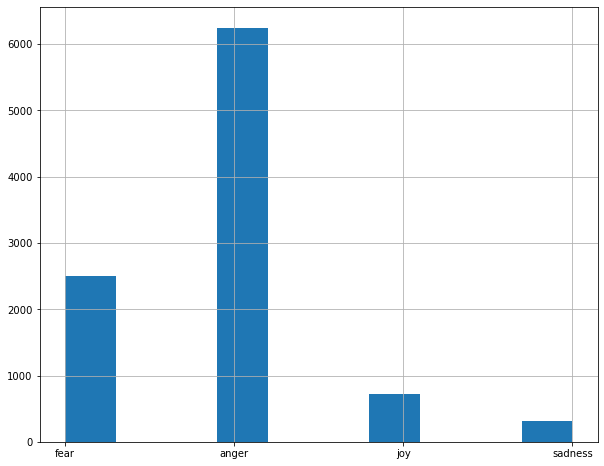

In [19]:
tweetTOT["sentiment"].hist()

In [20]:
def set_polarity(neg, pos):
    if neg>pos:
        myvalue = 'neg'
    elif neg < pos:
        myvalue ="pos"
    elif neg == pos:
        myvalue ="neu"
    return myvalue


In [21]:
tweetTOT['polarity'] = tweetTOT.apply(lambda x: set_polarity(x['neg'], x['pos']), axis=1)

In [22]:
tweetTOT

,Unnamed: 0,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,...,tweet_POS,POS_count,POS_lunghezza_media,hash_unique_count,hash_lunghezza_media,word_f,neg,pos,sentiment,polarity
0,0,2020-06-04,266910319,appleforyou83,Theappleforyou,immuni app contenere contagi covid fase vers,[],0,0,0,...,"[('immuni', 'JJ'), ('app', 'NN'), ('contenere'...",12,7.928571,0,NaN,immuni,0.9998,0.0002,fear,neg
1,1,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,valà piergianfranco lotta privacy chissà azion...,[],1,0,0,...,"[('valà', 'NN'), ('piergianfranco', 'NN'), ('l...",18,8.857143,0,NaN,privacy,0.9998,0.0002,anger,neg
2,2,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,scaricate app immuni serve governo tracciarci ...,[],1,0,4,...,"[('scaricate', 'NN'), ('app', 'NN'), ('immuni'...",14,8.681818,0,NaN,immuni,0.9998,0.0002,anger,neg
3,3,2020-06-04,1267957495324172288,aleessi4m,alessia ✨,diegofusaro scusa attimo tieni così tanto priv...,[],0,0,1,...,"[('diegofusaro', 'NN'), ('scusa', 'NN'), ('att...",23,7.894737,0,NaN,privacy,0.9998,0.0002,anger,neg
4,4,2020-06-04,1337280565,garboek,GabryKeegan,qualcuno adotti bambino appimmu,[],0,0,2,...,"[('qualcuno', 'NN'), ('adotti', 'NNS'), ('bamb...",7,8.750000,1,9.000000,NaN,0.9991,0.0009,joy,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9779,9779,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,giorgiameloni belpietrotweet giusto rendiamo o...,"[{'screen_name': 'immuni_app', 'name': 'immuni...",0,0,0,...,"[('giorgiameloni', 'JJ'), ('belpietrotweet', '...",27,8.818182,3,10.666667,immuniapp,0.9997,0.0003,anger,neg
9780,9780,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,update greenpass zoneacolori restrizioni lockd...,[],0,0,0,...,"[('update', 'JJ'), ('greenpass', 'NN'), ('zone...",34,8.900000,15,9.133333,greenpass,0.9998,0.0002,anger,neg
9781,9781,2021-08-08,1006624848272154624,grossofanken,grossofanken,bel cashback ogni esibizione scaricato esclusi...,[],1,0,0,...,"[('bel', 'NN'), ('cashback', 'NN'), ('ogni', '...",12,9.055556,3,12.666667,immuniapp,0.0004,0.9996,anger,pos
9782,9782,2021-08-29,1260497008986652678,lorech__,Lore,dino sbonaccini vede differenza problema grave...,[],3,0,3,...,"[('dino', 'NN'), ('sbonaccini', 'NN'), ('vede'...",19,8.250000,0,NaN,immuniapp,0.9998,0.0002,anger,neg


In [23]:
tweet2020_

,Unnamed: 0,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,...,ment_count,token,n_tok,token_lunghezza_media,tweet_POS,POS_count,POS_lunghezza_media,hash_unique_count,hash_lunghezza_media,word_f
0,0,2020-06-04,266910319,appleforyou83,Theappleforyou,immuni app contenere contagi covid fase vers,[],0,0,0,...,0,"['immuni', 'app', 'contenere', 'contagi', 'cov...",7,8.571429,"[('immuni', 'JJ'), ('app', 'NN'), ('contenere'...",12,7.928571,0,NaN,immuni
1,1,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,valà piergianfranco lotta privacy chissà azion...,[],1,0,0,...,0,"['valà', 'piergianfranco', 'lotta', 'privacy',...",14,10.714286,"[('valà', 'NN'), ('piergianfranco', 'NN'), ('l...",18,8.857143,0,NaN,privacy
2,2,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,scaricate app immuni serve governo tracciarci ...,[],1,0,4,...,0,"['scaricate', 'app', 'immuni', 'serve', 'gover...",11,10.363636,"[('scaricate', 'NN'), ('app', 'NN'), ('immuni'...",14,8.681818,0,NaN,immuni
3,3,2020-06-04,1267957495324172288,aleessi4m,alessia ✨,diegofusaro scusa attimo tieni così tanto priv...,[],0,0,1,...,1,"['diegofusaro', 'scusa', 'attimo', 'tieni', 'c...",19,8.789474,"[('diegofusaro', 'NN'), ('scusa', 'NN'), ('att...",23,7.894737,0,NaN,privacy
4,4,2020-06-04,1337280565,garboek,GabryKeegan,qualcuno adotti bambino appimmu,[],0,0,2,...,0,"['qualcuno', 'adotti', 'bambino', 'appimmu']",4,10.250000,"[('qualcuno', 'NN'), ('adotti', 'NNS'), ('bamb...",7,8.750000,1,9.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9732,9732,2020-12-30,1053258748230332416,adrianaspappa,Adriana Spappa,conte patente vaccinati valutazioni maggiore m...,[],5,1,20,...,0,"['conte', 'patente', 'vaccinati', 'valutazioni...",9,10.888889,"[('conte', 'NN'), ('patente', 'NN'), ('vaccina...",12,8.944444,1,5.0000,immuniapp
9733,9733,2020-12-30,492958448,silvestrip,Pino Silvestri,governo deve prestare attenzione lezioni stori...,[],0,0,0,...,0,"['governo', 'deve', 'prestare', 'attenzione', ...",23,10.565217,"[('governo', 'NN'), ('deve', 'NNS'), ('prestar...",28,8.891304,14,7.7500,covid
9734,9734,2020-12-30,492958448,silvestrip,Pino Silvestri,coronavirus italia bollettino dicembre nuovi c...,[],0,0,0,...,0,"['coronavirus', 'italia', 'bollettino', 'dicem...",22,10.454545,"[('coronavirus', 'NN'), ('italia', 'NN'), ('bo...",25,8.750000,14,8.0625,covid
9735,9735,2020-12-31,1053258748230332416,adrianaspappa,Adriana Spappa,toninelli ricevuto segnalazioni immuniapp esse...,[],5,1,10,...,0,"['toninelli', 'ricevuto', 'segnalazioni', 'imm...",19,10.947368,"[('toninelli', 'JJ'), ('ricevuto', 'NN'), ('se...",24,9.000000,1,9.0000,immuniapp


In [29]:
tweetTOT.to_csv("tweetTOT_polarity.csv")

In [30]:
tweetTOT['polarity'].value_counts()

neg    8580
pos    1204
Name: polarity, dtype: int64

(-0.5, 999.5, 499.5, -0.5)

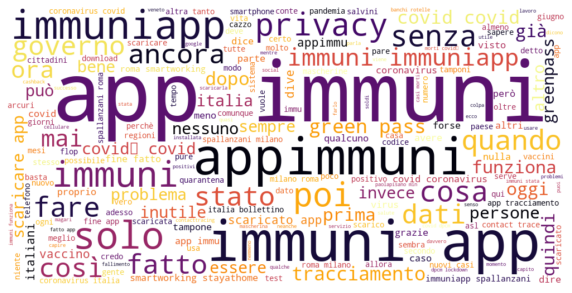

In [34]:
tweet_df = tweetTOT
words = ' '.join([word for word in tweetTOT[tweetTOT['polarity']=='neg']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=150, background_color = 'white', colormap='inferno').generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/wordcloud_parole_neg.jpg')
plt.axis('off')

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
df = pd.read_csv("dati/tweetTOT_polarity_sent.csv")


In [37]:
df

,Unnamed: 0,Unnamed: 0.1,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,...,token_lunghezza_media,tweet_POS,POS_count,POS_lunghezza_media,hash_unique_count,hash_lunghezza_media,word_f,neg,pos,sentiment
0,0,0,2020-06-04,266910319,appleforyou83,Theappleforyou,immuni app contenere contagi covid fase vers,[],0,0,...,8.571429,"[('immuni', 'JJ'), ('app', 'NN'), ('contenere'...",12,7.928571,0,NaN,immuni,0.9998,0.0002,fear
1,1,1,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,valà piergianfranco lotta privacy chissà azion...,[],1,0,...,10.714286,"[('valà', 'NN'), ('piergianfranco', 'NN'), ('l...",18,8.857143,0,NaN,privacy,0.9998,0.0002,anger
2,2,2,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,scaricate app immuni serve governo tracciarci ...,[],1,0,...,10.363636,"[('scaricate', 'NN'), ('app', 'NN'), ('immuni'...",14,8.681818,0,NaN,immuni,0.9998,0.0002,anger
3,3,3,2020-06-04,1267957495324172288,aleessi4m,alessia ✨,diegofusaro scusa attimo tieni così tanto priv...,[],0,0,...,8.789474,"[('diegofusaro', 'NN'), ('scusa', 'NN'), ('att...",23,7.894737,0,NaN,privacy,0.9998,0.0002,anger
4,4,4,2020-06-04,1337280565,garboek,GabryKeegan,qualcuno adotti bambino appimmu,[],0,0,...,10.250000,"[('qualcuno', 'NN'), ('adotti', 'NNS'), ('bamb...",7,8.750000,1,9.000000,NaN,0.9991,0.0009,joy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9779,9779,9779,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,giorgiameloni belpietrotweet giusto rendiamo o...,"[{'screen_name': 'immuni_app', 'name': 'immuni...",0,0,...,10.590909,"[('giorgiameloni', 'JJ'), ('belpietrotweet', '...",27,8.818182,3,10.666667,immuniapp,0.9997,0.0003,anger
9780,9780,9780,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,update greenpass zoneacolori restrizioni lockd...,[],0,0,...,10.680000,"[('update', 'JJ'), ('greenpass', 'NN'), ('zone...",34,8.900000,15,9.133333,greenpass,0.9998,0.0002,anger
9781,9781,9781,2021-08-08,1006624848272154624,grossofanken,grossofanken,bel cashback ogni esibizione scaricato esclusi...,[],1,0,...,11.111111,"[('bel', 'NN'), ('cashback', 'NN'), ('ogni', '...",12,9.055556,3,12.666667,immuniapp,0.0004,0.9996,anger
9782,9782,9782,2021-08-29,1260497008986652678,lorech__,Lore,dino sbonaccini vede differenza problema grave...,[],3,0,...,9.375000,"[('dino', 'NN'), ('sbonaccini', 'NN'), ('vede'...",19,8.250000,0,NaN,immuniapp,0.9998,0.0002,anger


<AxesSubplot:xlabel='sentiment', ylabel='Count'>

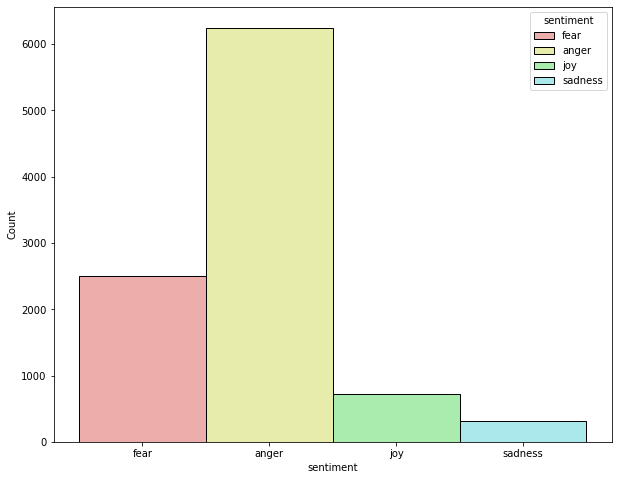

In [38]:
sns.set_palette("hls")
sns.histplot(x="sentiment", data=df, hue = "sentiment")


In [39]:
df2020 = df[df["date"] <= "2020-12-31"].copy()

In [40]:
len(df2020)

6397

In [41]:
df2021 =  df[df["date"] >= "2021-01-01"].copy()
df2021

,Unnamed: 0,Unnamed: 0.1,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,...,token_lunghezza_media,tweet_POS,POS_count,POS_lunghezza_media,hash_unique_count,hash_lunghezza_media,word_f,neg,pos,sentiment
3626,3626,3626,2021-01-02,1066323577,jhpelleg,giancarlo,rcolosimo posso solo darti tutta solidarietà c...,[],0,0,...,9.695652,"[('rcolosimo', 'NN'), ('posso', 'NN'), ('solo'...",27,8.391304,0,NaN,immuni,0.9998,0.0002,joy
3627,3627,3627,2021-01-02,752856442265296896,moonlnmr,elena,app immuni ricorda continuo riattivarla mentre...,[],0,0,...,9.200000,"[('app', 'NN'), ('immuni', 'JJ'), ('ricorda', ...",13,8.100000,0,NaN,immuni,0.9998,0.0002,anger
3628,3628,3628,2021-01-01,57865902,rcolosimo,Raffaello Colosimo,marco dalformai cardelliac marco tracciamento ...,[],1,0,...,10.538462,"[('marco', 'NN'), ('dalformai', 'NN'), ('carde...",32,8.788462,0,NaN,immuni,0.9998,0.0002,anger
3629,3629,3629,2021-01-01,3375838637,bergonzi89,Gino Bergonzi,isolamento lockdown mascherine app immuni poi ...,[],0,0,...,9.352941,"[('isolamento', 'NN'), ('lockdown', 'JJ'), ('m...",20,8.176471,1,12.000000,immuni,0.9998,0.0002,anger
3630,3630,3630,2021-01-01,1318896199689273345,gionibigud,Gioni Bi Gud,attivato subito app immuni cashback spiega mol...,[],0,0,...,8.923077,"[('attivato', 'NN'), ('subito', 'NN'), ('app',...",16,7.961538,0,NaN,immuni,0.9672,0.0328,anger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9779,9779,9779,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,giorgiameloni belpietrotweet giusto rendiamo o...,"[{'screen_name': 'immuni_app', 'name': 'immuni...",0,0,...,10.590909,"[('giorgiameloni', 'JJ'), ('belpietrotweet', '...",27,8.818182,3,10.666667,immuniapp,0.9997,0.0003,anger
9780,9780,9780,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,update greenpass zoneacolori restrizioni lockd...,[],0,0,...,10.680000,"[('update', 'JJ'), ('greenpass', 'NN'), ('zone...",34,8.900000,15,9.133333,greenpass,0.9998,0.0002,anger
9781,9781,9781,2021-08-08,1006624848272154624,grossofanken,grossofanken,bel cashback ogni esibizione scaricato esclusi...,[],1,0,...,11.111111,"[('bel', 'NN'), ('cashback', 'NN'), ('ogni', '...",12,9.055556,3,12.666667,immuniapp,0.0004,0.9996,anger
9782,9782,9782,2021-08-29,1260497008986652678,lorech__,Lore,dino sbonaccini vede differenza problema grave...,[],3,0,...,9.375000,"[('dino', 'NN'), ('sbonaccini', 'NN'), ('vede'...",19,8.250000,0,NaN,immuniapp,0.9998,0.0002,anger


In [42]:
len(df2021)

3387

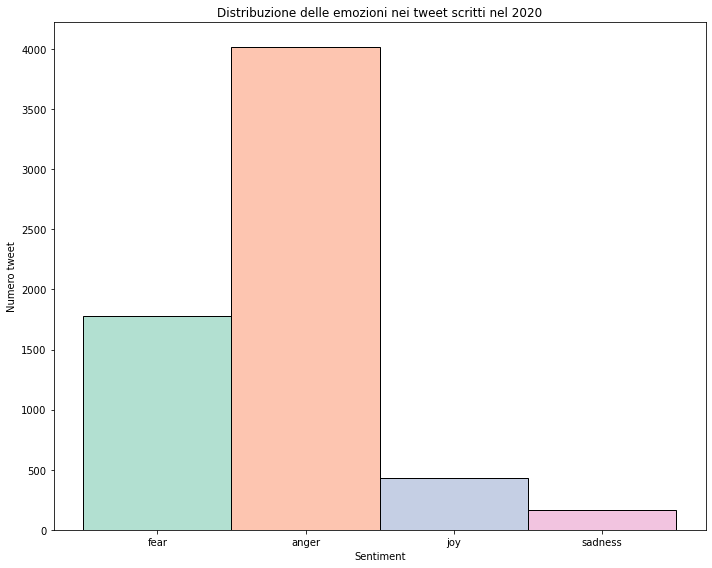

In [43]:
sns.set_palette("Set2")
sns.histplot(x="sentiment", data=df2020, hue = "sentiment", legend = False).set_title('Distribuzione delle emozioni nei tweet scritti nel 2020')
plt.xlabel("Sentiment")
plt.ylabel("Numero tweet")
plt.savefig("img/sent_tweet_2020.png")
plt.tight_layout()


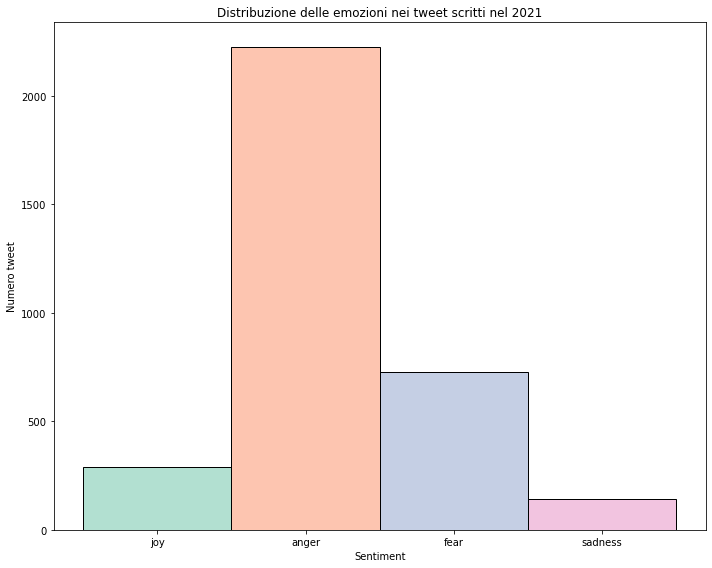

In [44]:
sns.set_palette("Set2")
sns.histplot(x="sentiment", data=df2021, hue = "sentiment", legend = False).set_title('Distribuzione delle emozioni nei tweet scritti nel 2021')
plt.xlabel("Sentiment")
plt.ylabel("Numero tweet")
plt.tight_layout()
plt.savefig("img/sent_tweet_2021.png")

In [45]:
df2020["sentiment"].value_counts() #2020

anger      4021
fear       1779
joy         433
sadness     164
Name: sentiment, dtype: int64

In [46]:
df2021["sentiment"].value_counts() #2021

anger      2228
fear        728
joy         288
sadness     143
Name: sentiment, dtype: int64

In [47]:
df["sentiment"].value_counts() #in generale

anger      6249
fear       2507
joy         721
sadness     307
Name: sentiment, dtype: int64

In [50]:
#nlp = spacy.load('it')
nlp = spacy.load("it_core_news_sm")

In [51]:
df['doc'] = [nlp(text) for text in df.tweet]

In [52]:
df['n_tok'] = [len(token) for token in df.doc]
df['tok'] = [token for token in df.doc]


In [53]:
df["doc_cleaned"] = [nlp(text) for text in df.tweet]

In [54]:
df['tok_cleaned'] = [token for token in df.doc_cleaned]

In [55]:
df2020_ = df[df["date"] <= "2020-12-31"].copy()
df2021_ =  df[df["date"] >= "2021-10-01"].copy()

In [56]:
df2020_

,Unnamed: 0,Unnamed: 0.1,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,...,hash_unique_count,hash_lunghezza_media,word_f,neg,pos,sentiment,doc,tok,doc_cleaned,tok_cleaned
0,0,0,2020-06-04,266910319,appleforyou83,Theappleforyou,immuni app contenere contagi covid fase vers,[],0,0,...,0,NaN,immuni,0.9998,0.0002,fear,"(immuni, app, contenere, contagi, covid, fase,...","(immuni, app, contenere, contagi, covid, fase,...","(immuni, app, contenere, contagi, covid, fase,...","(immuni, app, contenere, contagi, covid, fase,..."
1,1,1,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,valà piergianfranco lotta privacy chissà azion...,[],1,0,...,0,NaN,privacy,0.9998,0.0002,anger,"(valà, piergianfranco, lotta, privacy, chissà,...","(valà, piergianfranco, lotta, privacy, chissà,...","(valà, piergianfranco, lotta, privacy, chissà,...","(valà, piergianfranco, lotta, privacy, chissà,..."
2,2,2,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,scaricate app immuni serve governo tracciarci ...,[],1,0,...,0,NaN,immuni,0.9998,0.0002,anger,"(scaricate, app, immuni, serve, governo, tracc...","(scaricate, app, immuni, serve, governo, tracc...","(scaricate, app, immuni, serve, governo, tracc...","(scaricate, app, immuni, serve, governo, tracc..."
3,3,3,2020-06-04,1267957495324172288,aleessi4m,alessia ✨,diegofusaro scusa attimo tieni così tanto priv...,[],0,0,...,0,NaN,privacy,0.9998,0.0002,anger,"(diegofusaro, scusa, attimo, tieni, così, tant...","(diegofusaro, scusa, attimo, tieni, così, tant...","(diegofusaro, scusa, attimo, tieni, così, tant...","(diegofusaro, scusa, attimo, tieni, così, tant..."
4,4,4,2020-06-04,1337280565,garboek,GabryKeegan,qualcuno adotti bambino appimmu,[],0,0,...,1,9.0000,NaN,0.9991,0.0009,joy,"(qualcuno, adotti, bambino, appimmu)","(qualcuno, adotti, bambino, appimmu)","(qualcuno, adotti, bambino, appimmu)","(qualcuno, adotti, bambino, appimmu)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9732,9732,9732,2020-12-30,1053258748230332416,adrianaspappa,Adriana Spappa,conte patente vaccinati valutazioni maggiore m...,[],5,1,...,1,5.0000,immuniapp,0.9997,0.0003,fear,"(conte, patente, vaccinati, valutazioni, maggi...","(conte, patente, vaccinati, valutazioni, maggi...","(conte, patente, vaccinati, valutazioni, maggi...","(conte, patente, vaccinati, valutazioni, maggi..."
9733,9733,9733,2020-12-30,492958448,silvestrip,Pino Silvestri,governo deve prestare attenzione lezioni stori...,[],0,0,...,14,7.7500,covid,0.9998,0.0002,fear,"(governo, deve, prestare, attenzione, lezioni,...","(governo, deve, prestare, attenzione, lezioni,...","(governo, deve, prestare, attenzione, lezioni,...","(governo, deve, prestare, attenzione, lezioni,..."
9734,9734,9734,2020-12-30,492958448,silvestrip,Pino Silvestri,coronavirus italia bollettino dicembre nuovi c...,[],0,0,...,14,8.0625,covid,0.9998,0.0002,fear,"(coronavirus, italia, bollettino, dicembre, nu...","(coronavirus, italia, bollettino, dicembre, nu...","(coronavirus, italia, bollettino, dicembre, nu...","(coronavirus, italia, bollettino, dicembre, nu..."
9735,9735,9735,2020-12-31,1053258748230332416,adrianaspappa,Adriana Spappa,toninelli ricevuto segnalazioni immuniapp esse...,[],5,1,...,1,9.0000,immuniapp,0.9998,0.0002,fear,"(toninelli, ricevuto, segnalazioni, immuniapp,...","(toninelli, ricevuto, segnalazioni, immuniapp,...","(toninelli, ricevuto, segnalazioni, immuniapp,...","(toninelli, ricevuto, segnalazioni, immuniapp,..."


In [57]:
df2021_

,Unnamed: 0,Unnamed: 0.1,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,...,hash_unique_count,hash_lunghezza_media,word_f,neg,pos,sentiment,doc,tok,doc_cleaned,tok_cleaned
6598,6598,6598,2021-10-01,1298528549591224320,cravattarossa,Barbara de La Fonte,lykanla ortigiap sostituisce app immuni ricomi...,[],0,0,...,0,NaN,immuni,0.9115,0.0885,joy,"(lykanla, ortigiap, sostituisce, app, immuni, ...","(lykanla, ortigiap, sostituisce, app, immuni, ...","(lykanla, ortigiap, sostituisce, app, immuni, ...","(lykanla, ortigiap, sostituisce, app, immuni, ..."
6599,6599,6599,2021-10-01,3091275909,a_lianse,Annamaria.S,silenzio primo pomeriggio limbo privo notifich...,[],0,0,...,3,16.666667,immuni,0.9998,0.0002,sadness,"(silenzio, primo, pomeriggio, limbo, privo, no...","(silenzio, primo, pomeriggio, limbo, privo, no...","(silenzio, primo, pomeriggio, limbo, privo, no...","(silenzio, primo, pomeriggio, limbo, privo, no..."
6600,6600,6600,2021-10-01,622780112,egonmau,mau egon,corriere giornalista colui distingue vero fals...,[],0,0,...,0,NaN,immuni,0.9997,0.0003,anger,"(corriere, giornalista, colui, distingue, vero...","(corriere, giornalista, colui, distingue, vero...","(corriere, giornalista, colui, distingue, vero...","(corriere, giornalista, colui, distingue, vero..."
6601,6601,6601,2021-10-01,26502675,ianez,ianez,marta pellizzi capitato app immuni appare gree...,[],0,0,...,0,NaN,immuni,0.9997,0.0003,sadness,"(marta, pellizzi, capitato, app, immuni, appar...","(marta, pellizzi, capitato, app, immuni, appar...","(marta, pellizzi, capitato, app, immuni, appar...","(marta, pellizzi, capitato, app, immuni, appar..."
6602,6602,6602,2021-10-02,198598217,ilboni78,👉 𝙸𝚕𝙱𝚘𝚗𝚒𝟽𝟾 ®✊🔨,fine fatto poi app immuni tifosi finita sotto ...,[],3,1,...,0,NaN,immuni,0.9998,0.0002,anger,"(fine, fatto, poi, app, immuni, tifosi, finita...","(fine, fatto, poi, app, immuni, tifosi, finita...","(fine, fatto, poi, app, immuni, tifosi, finita...","(fine, fatto, poi, app, immuni, tifosi, finita..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6881,6881,6881,2021-11-29,761634173782294530,dragonerossoen1,DraGOnERoSSoNerO,anahys immuni app,[],1,0,...,0,NaN,immuni,0.9997,0.0003,fear,"(anahys, immuni, app)","(anahys, immuni, app)","(anahys, immuni, app)","(anahys, immuni, app)"
6882,6882,6882,2021-11-29,1385660793031696388,blackan68873025,🖤Black & Blue💙,rivoluzionaria app immuni funziona ancora omicron,[],0,0,...,2,13.000000,immuni,0.9998,0.0002,anger,"(rivoluzionaria, app, immuni, funziona, ancora...","(rivoluzionaria, app, immuni, funziona, ancora...","(rivoluzionaria, app, immuni, funziona, ancora...","(rivoluzionaria, app, immuni, funziona, ancora..."
6883,6883,6883,2021-11-29,1006249395715825664,sconosciutavera,sconosciuta,intanto comincia prorogare app immuni tracciam...,[],1,1,...,0,NaN,immuni,0.9998,0.0002,fear,"(intanto, comincia, prorogare, app, immuni, tr...","(intanto, comincia, prorogare, app, immuni, tr...","(intanto, comincia, prorogare, app, immuni, tr...","(intanto, comincia, prorogare, app, immuni, tr..."
6884,6884,6884,2021-11-29,1272644446639853572,piccoitalia,italian let's go brandon⭐⭐⭐,decreto legge aprile quest anno veniva specifi...,[],0,0,...,0,NaN,immuni,0.9979,0.0021,fear,"(decreto, legge, aprile, quest, anno, veniva, ...","(decreto, legge, aprile, quest, anno, veniva, ...","(decreto, legge, aprile, quest, anno, veniva, ...","(decreto, legge, aprile, quest, anno, veniva, ..."


In [58]:
tok_2020 = df2020_["tok"].tolist()
tok_2021 = df2021_["tok"].tolist()
tok = ' '.join(df['tweet']).split()

df2020_ = ' '.join(df2020_['tweet']).split()
df2021_ = ' '.join(df2021_['tweet']).split()


In [59]:
from nltk.probability import FreqDist

fdist2020 = FreqDist(tok_2020).most_common(15)
fdist2021 = FreqDist(tok_2021).most_common(15)

fdist2020Plot = pd.Series(dict(fdist2020))
fdist2021Plot = pd.Series(dict(fdist2021))

# for i, x in zip(fdistMaggio, fdistAgosto):
#     print("Tok maggio: ", i)
freqdist = FreqDist(tok).most_common(15)
freqdistPlot = pd.Series(dict(fdist2021Plot))


In [60]:
fdist2020

[(immuni app contenere contagi covid fase vers, 1),
 (valà piergianfranco lotta privacy chissà azioni riprovevoli potrebbe compiere governo tracciandoti app immuni altrimenti,
  1),
 (scaricate app immuni serve governo tracciarci controllarci sveglia gente abbasso dittatura,
  1),
 (diegofusaro scusa attimo tieni così tanto privacy tralasciando fatto immuni molto sicura tante altre app punto vista ancora qui,
  1),
 (qualcuno adotti bambino appimmu, 1),
 (finchè tampone sierologico scaricherò app immuni perchè app senza controlli tempestivi matita spuntata scrive quando pare,
  1),
 (bene fortunatamente risolto problema principale app immuni vignette state corrette femministe soddisfatte però tempo battaglie finito sappiatelo dive vignette donna single coppia omogenitoriale lgbteccecc,
  1),
 (funziona app immuni digilosofia, 1),
 (basta ste cagate app immuni cambia immagine contestata ora figlio braccio papà mentre mamma lavora,
  1),
 (coronavirus possibile scaricare app immuni tracc

In [61]:
fdist2021

[(lykanla ortigiap sostituisce app immuni ricomincia, 1),
 (silenzio primo pomeriggio limbo privo notifiche facebook citofoni grido dolore leva cellulare app immuni funziona correttamente,
  1),
 (corriere giornalista colui distingue vero falso pubblica falso propaganda app immuni servi regime,
  1),
 (marta pellizzi capitato app immuni appare green pass basta ditata codice scorre leggermente verso alto impedendo lettura soluzione ricentrare mano green pass schermo,
  1),
 (fine fatto poi app immuni tifosi finita sotto banchi rotelle ladri infami pezzi merda maledett,
  1),
 (crisciacca logikseo mandiamoli sti app immu, 1),
 (rete bella domanda riusciranno dive immuni fallito scaricamento green pass digitale telefoni milioni italiani attivato app micidiali controllo massa primo passo combattendo realmente,
  1),
 (ovunque nessuno rispetta regola nazipass卐 nessun controllo finirà barzelletta app immuni scaricato nessuno creato stato polizia psicoterrore cittadini ribellano aumentano num

### wordcloud (generica)

(-0.5, 999.5, 499.5, -0.5)

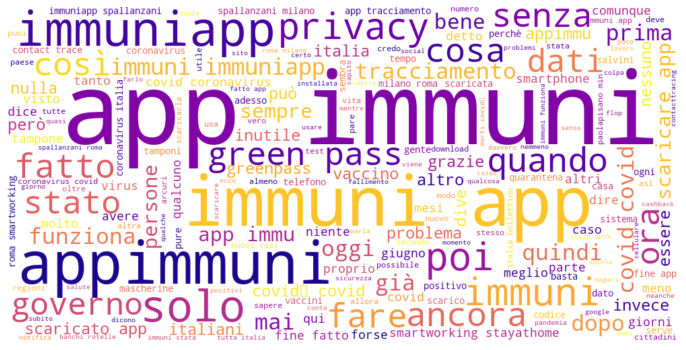

In [62]:
tweet_df = df
words = ' '.join([word for word in tweet_df['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=150, background_color = 'white', colormap='plasma').generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/wordcloud_parole_tot.jpg')
plt.tight_layout()
plt.axis('off')

#### WordCloud (paura)

(-0.5, 999.5, 499.5, -0.5)

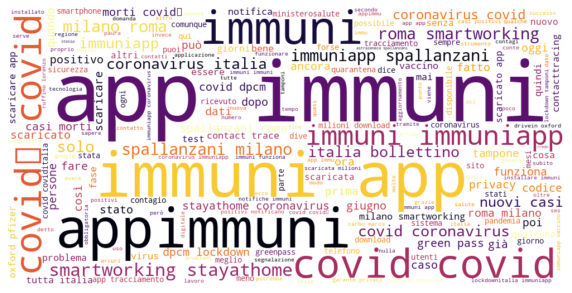

In [63]:
tweet_df = df
words = ' '.join([word for word in tweetTOT[tweetTOT['sentiment']=='fear']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=150, background_color = 'white', colormap='inferno').generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/wordcloud_parole_paura.jpg')
plt.axis('off')

#### wordcloud (gioia)

(-0.5, 999.5, 499.5, -0.5)

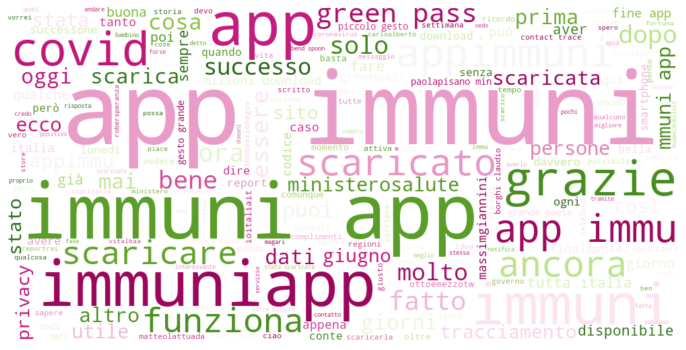

In [64]:
tweet_df = df
words = ' '.join([word for word in tweetTOT[tweetTOT['sentiment']=='joy']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=150, background_color = 'white', colormap= 'PiYG').generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/wordcloud_parole_gioia.jpg')
plt.tight_layout()
plt.axis('off')

#### wordcloud (rabbia)

(-0.5, 999.5, 499.5, -0.5)

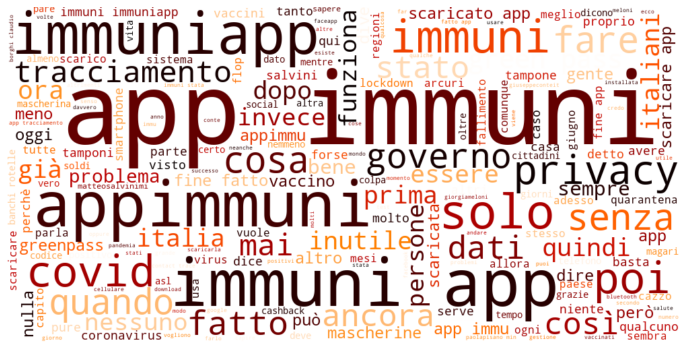

In [65]:

words = ' '.join([word for word in tweetTOT[tweetTOT['sentiment']=='anger']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=150, background_color = 'white', colormap='gist_heat').generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/wordcloud_parole_rabbia.jpg')
plt.tight_layout()
plt.axis('off')